In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/Users/maikol/Library/CloudStorage/Dropbox/home/documents/2024/2024_01_taller_100_paginas_ml':
  os.chdir(r'/Users/maikol/Library/CloudStorage/Dropbox/home/documents/2024/2024_01_taller_100_paginas_ml')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


/var/folders/4d/qj4qr8zx1n36td0hlt0p7x_h0000gn/T/ipykernel_18129/468825776.py:20: DeprecationWarning:

`set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`



{"/usr/local/Cellar/python@3.11/3.11.6_1/Frameworks/Python.framework/Versions/3.11/lib/python3.11/importlib/_bootstrap.py": 1696254354.0, "/usr/local/Cellar/python@3.11/3.11.6_1/Frameworks/Python.framework/Versions/3.11/lib/python3.11/importlib/_bootstrap_external.py": 1696254354.0, "/usr/local/Cellar/python@3.11/3.11.6_1/Frameworks/Python.framework/Versions/3.11/lib/python3.11/zipimport.py": 1696254354.0, "/usr/local/Cellar/python@3.11/3.11.6_1/Frameworks/Python.framework/Versions/3.11/lib/python3.11/codecs.py": 1696254354.0, "/usr/local/Cellar/python@3.11/3.11.6_1/Frameworks/Python.framework/Versions/3.11/lib/python3.11/encodings/aliases.py": 1696254354.0, "/usr/local/Cellar/python@3.11/3.11.6_1/Frameworks/Python.framework/Versions/3.11/lib/python3.11/encodings/__init__.py": 1696254354.0, "/usr/local/Cellar/python@3.11/3.11.6_1/Frameworks/Python.framework/Versions/3.11/lib/python3.11/encodings/utf_8.py": 1696254354.0, "/usr/local/Cellar/python@3.11/3.11.6_1/Frameworks/Python.framewor

In [2]:
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay

from scipy.stats import distributions
from numpy import sum
import numpy as np

In [3]:
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

In [4]:
clf = svm.SVC(kernel="linear", C=1000)

In [5]:
clf.fit(X, y)

SVC(C=1000, kernel='linear')

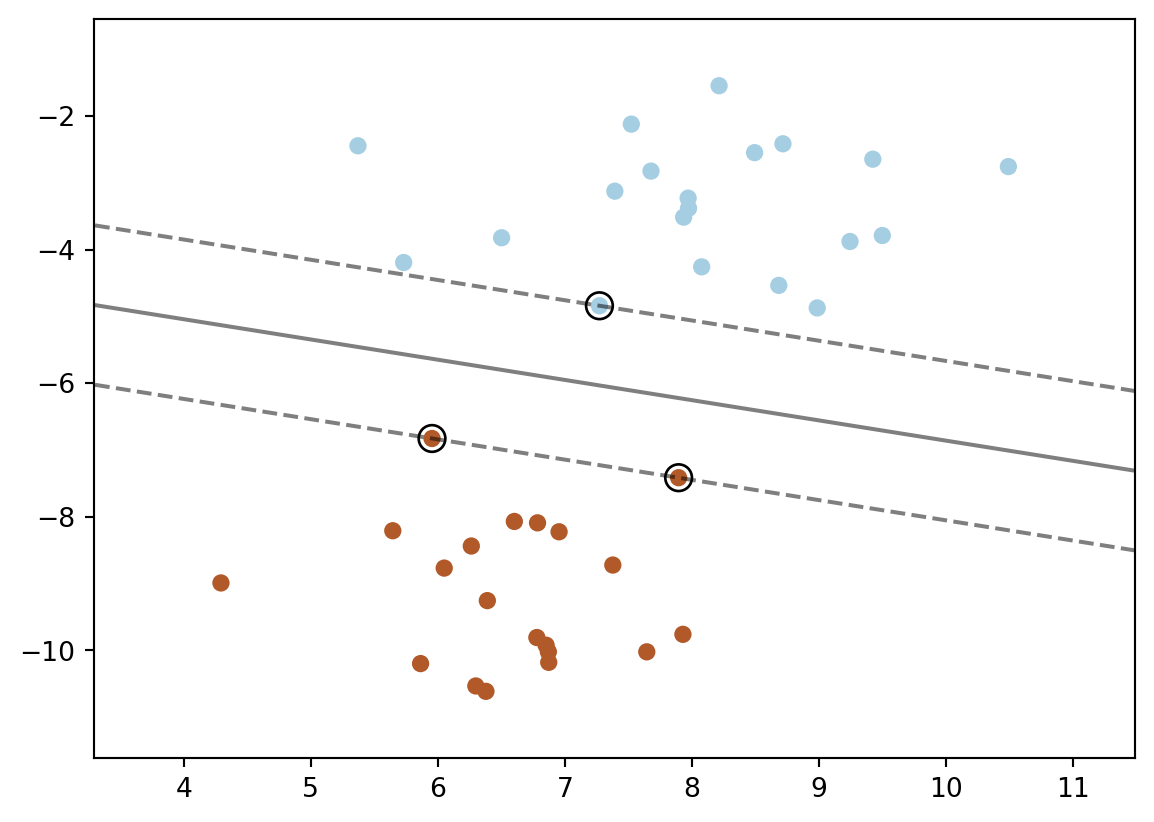

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

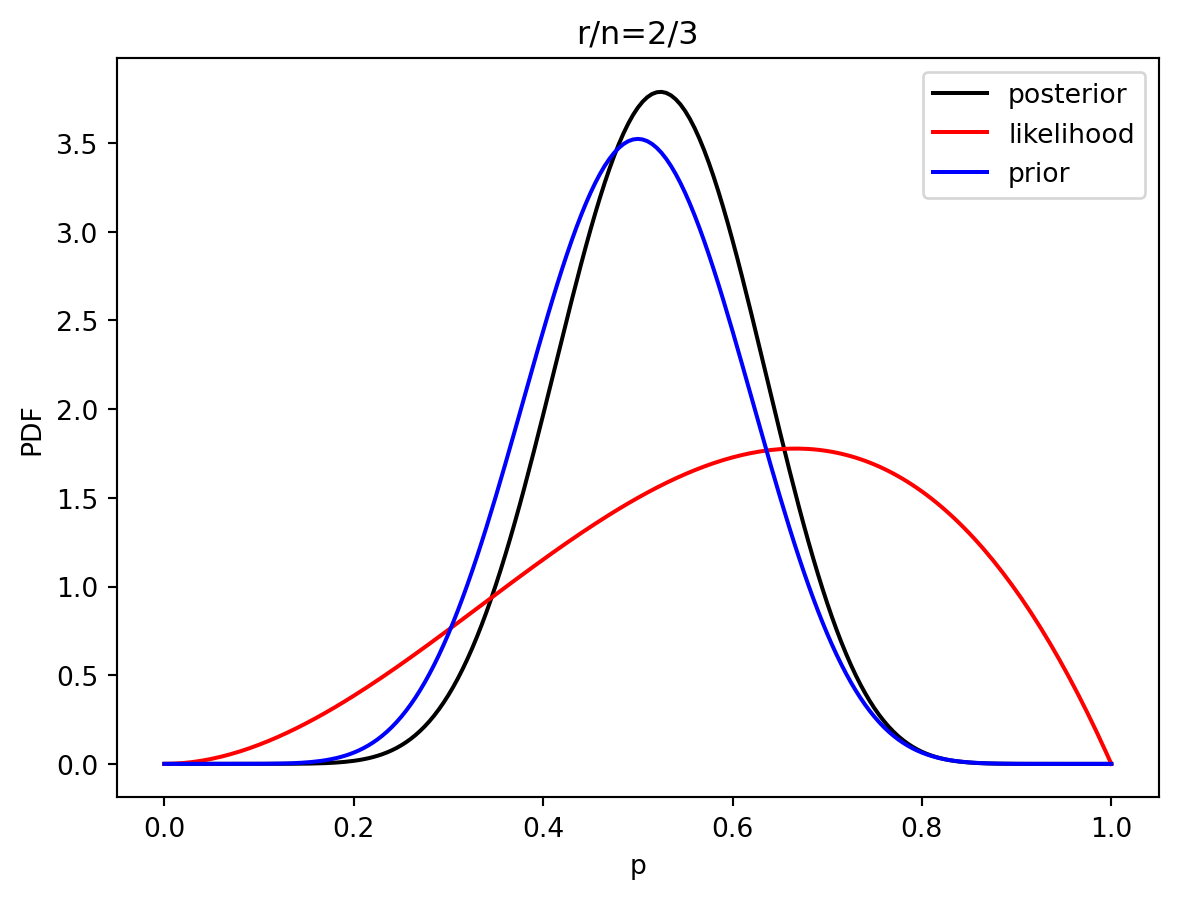

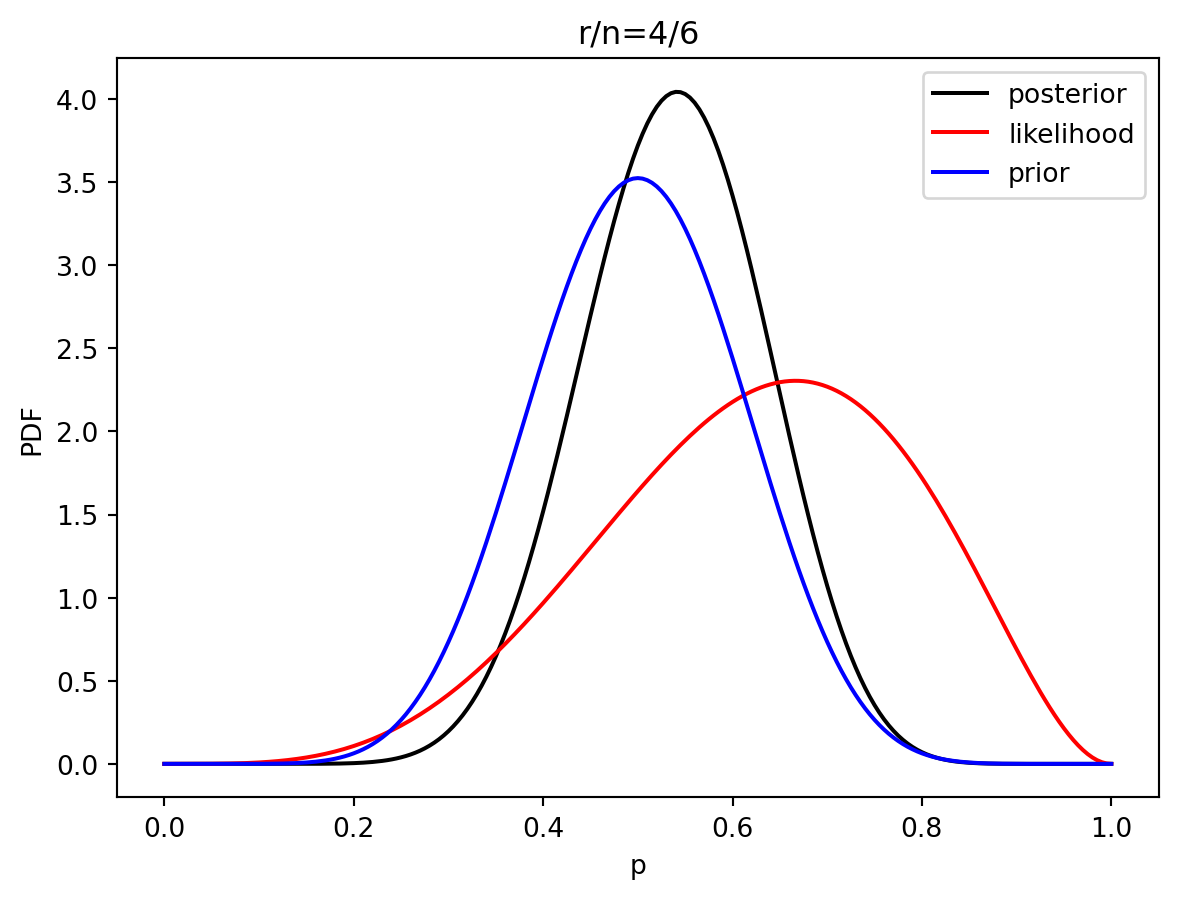

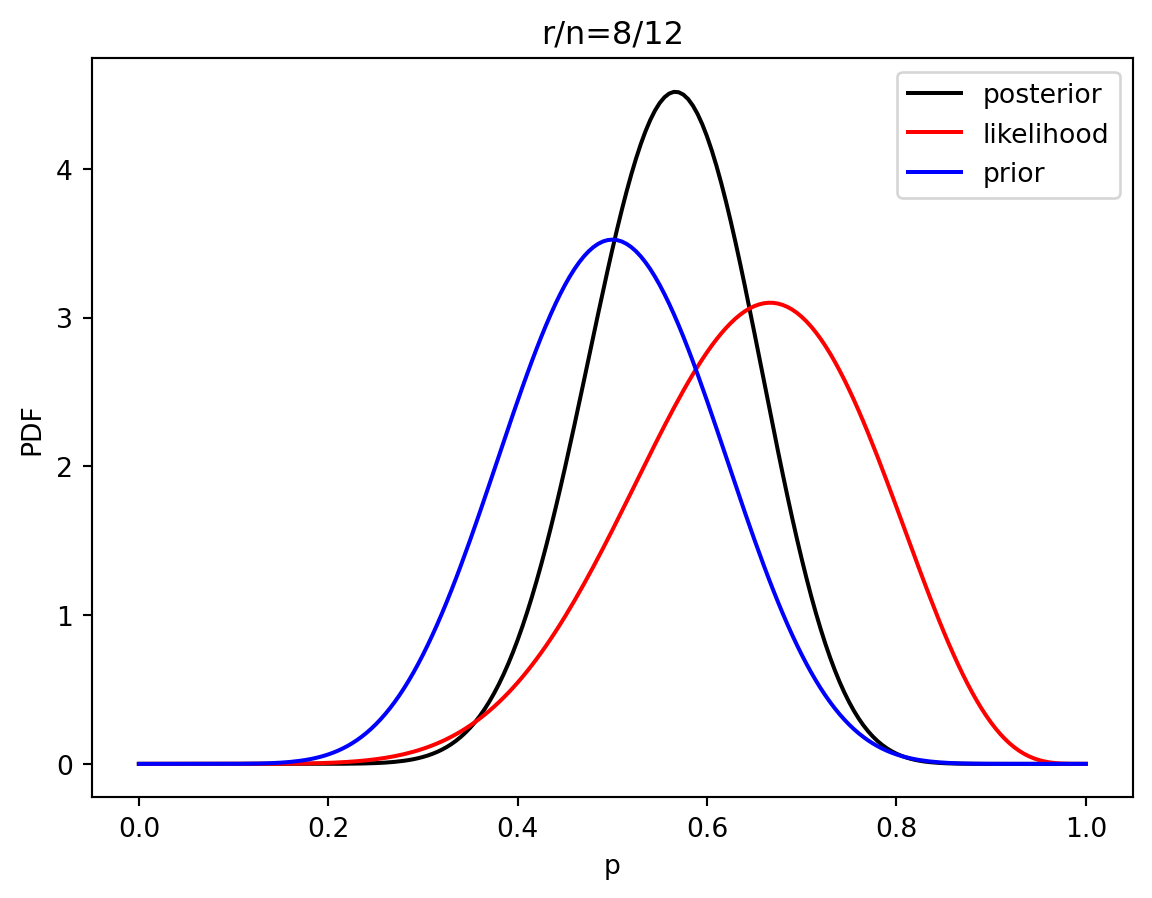

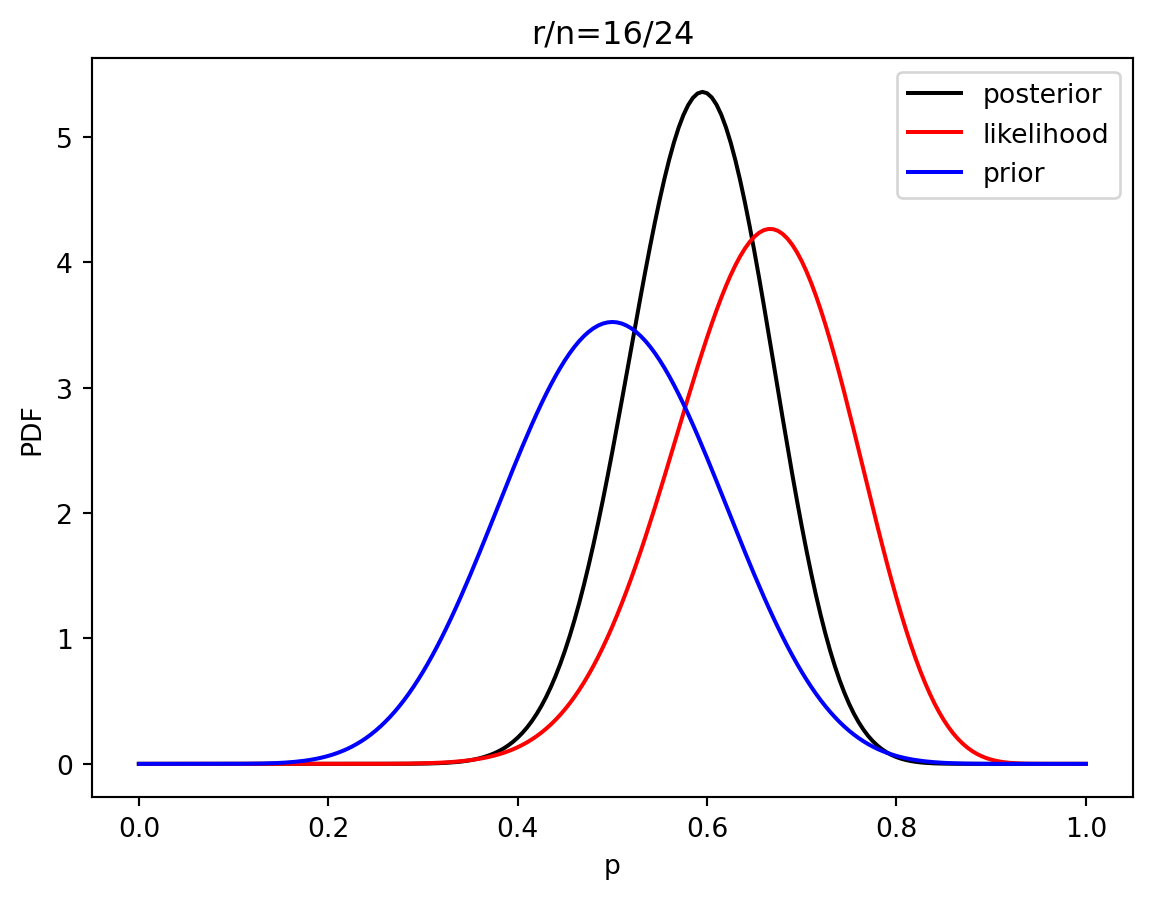

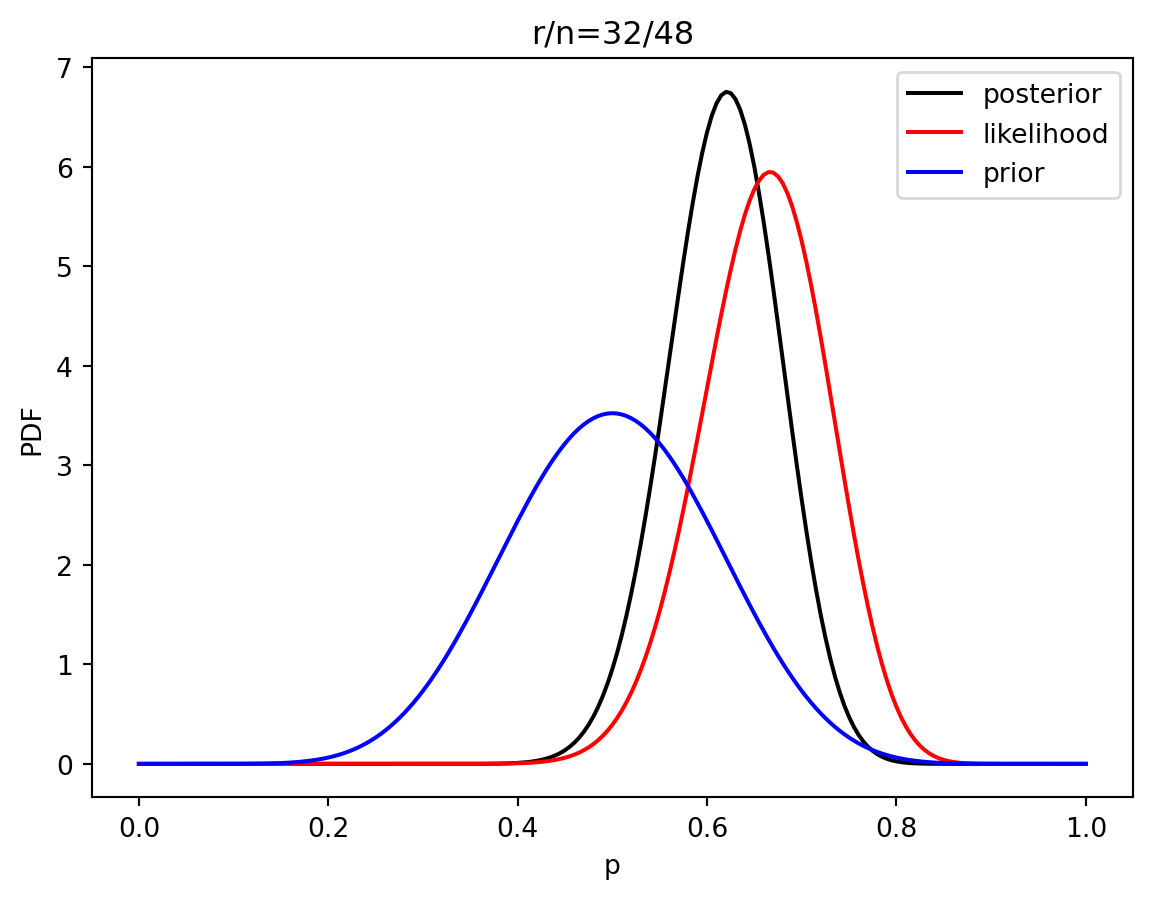

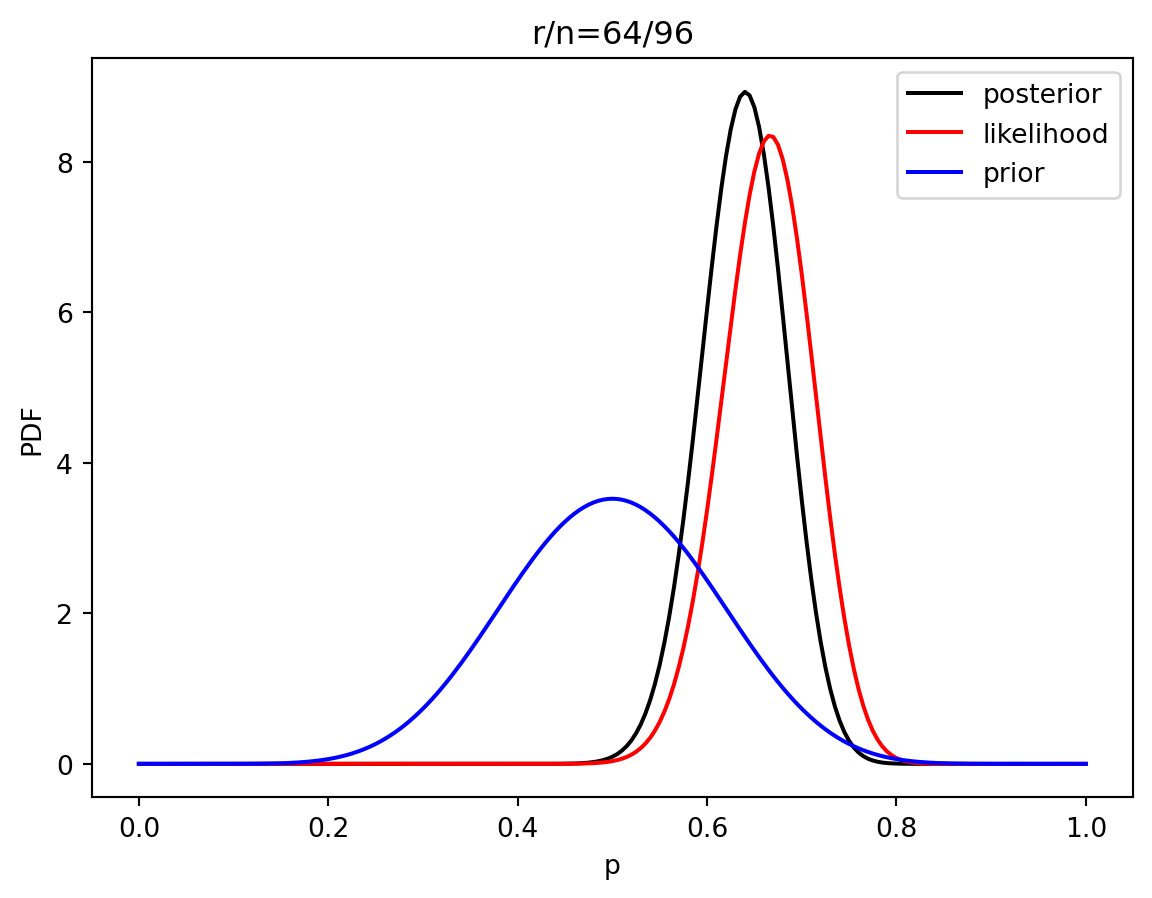

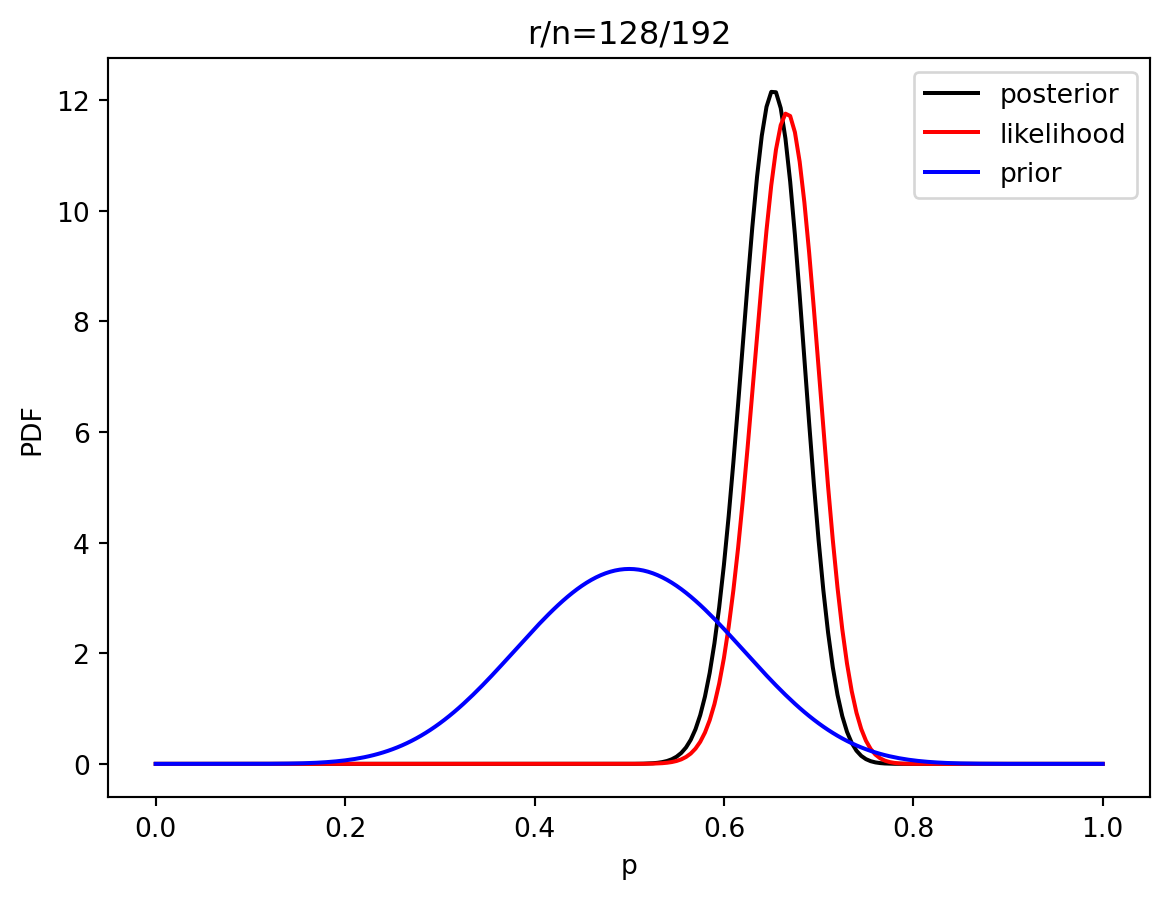

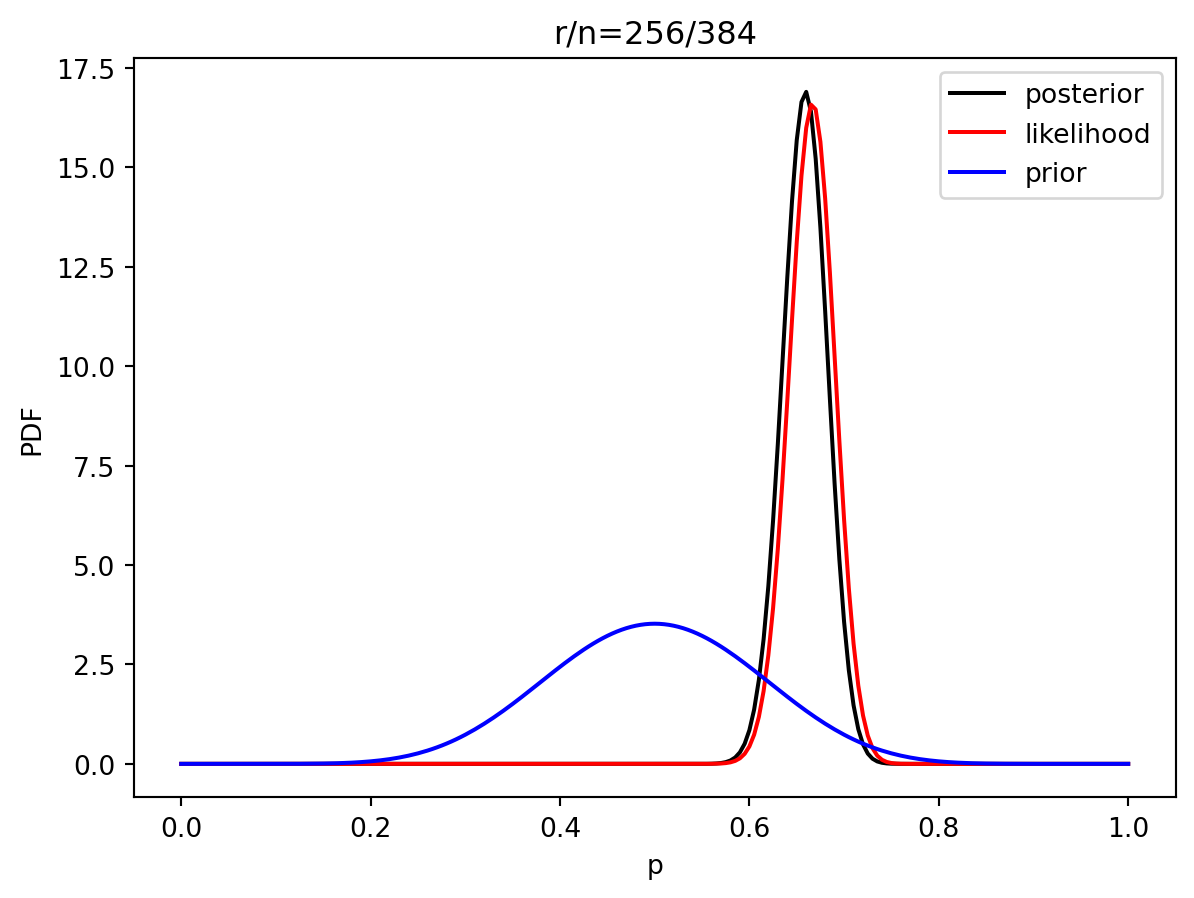

In [7]:
alpha = 10
beta = 10
n = 20
Nsamp = 201  # no of points to sample at
p = np.linspace(0, 1, Nsamp)
deltap = 1./(Nsamp-1)  # step size between samples of p

prior = distributions.beta.pdf(p, alpha, beta)

for i in range(1, 9):

    r = 2**i
    n = (3.0/2.0)*r
    like = distributions.binom.pmf(r, n, p)
    like = like/(deltap*sum(like))  # for plotting convenience only
    post = distributions.beta.pdf(p, alpha+r, beta+n-r)

    # make the figure
    plt.figure()
    plt.plot(p, post, 'k', label='posterior')
    plt.plot(p, like, 'r', label='likelihood')
    plt.plot(p, prior, 'b', label='prior')
    plt.xlabel('p')
    plt.ylabel('PDF')
    plt.legend(loc='best')
    plt.title('r/n={}/{:.0f}'.format(r, n))
    plt.show()